Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


Now, read data using pandas dataframe:


In [23]:
my_data = pd.read_csv("E:\My Documents\Machine Learning\DataSets/drug200.csv")
my_data.head(50)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values #independent variable 
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [8]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['F','M'])
X[:,1] = le_gender.transform(X[:,1])  #I AM UPDATING MY FIRST COLUMN FROM F,M TO 0,1


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2]) #I AM UPDATING MY SECOND COLUMN FROM HIGH,LOW,NORMAL TO 0,1,2


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) #I AM UPDATING MY SECOND COLUMN FROM HIGH,NORMAL TO 0,1

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


In [10]:
y = my_data["Drug"] #DEPENDENT VARIABLE
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [12]:

from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [13]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [14]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [15]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [17]:
y_pred = drugTree.predict(X_testset)

array(['drugY'], dtype=object)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [18]:
print (y_pred [0:5])#predicted by the ml model
print (y_testset [0:5])#actual values we have


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [19]:
y_testset

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
179    drugY
83     drugA
25     drugY
190    drugY
159    drugX
173    drugY
95     drugX
3      drugX
41     drugB
58     drugX
14     drugX
143    drugY
12     drugY
6      drugY
182    drugX
161    drugB
128    drugY
122    drugY
101    drugA
86     drugX
64     drugB
47     drugC
158    drugC
34     drugX
38     drugX
196    drugC
4      drugY
72     drugX
67     drugX
145    drugX
156    drugA
115    drugY
155    drugC
15     drugY
61     drugA
175    drugY
120    drugY
130    drugY
23     drugY
153    drugX
31     drugB
103    drugX
89     drugY
132    drugX
109    drugY
126    drugY
17     drugA
30     drugX
178    drugY
162    drugX
Name: Drug, dtype: object

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [20]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [24]:
my_data.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [25]:
drugTree.predict([[35,0,1,0,15.0]])

array(['drugY'], dtype=object)

In [26]:
max(my_data['Na_to_K'])

38.247

In [27]:
min(my_data['Na_to_K'])

6.269

In [35]:
my_data.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [29]:
n = int(input("enter the number of patients data we need to check--->"))
lst = []
for i in range(n):
    age = int(input("enter the age--->"))
    gender = int(input("enter the gender 0 for female 1 for male-->"))
    Bp = int(input("enter the Bp 0 for high 1 for low 2 for normal-->"))
    Cholesterol = int(input("enter the chelosterol 0 for high 1 for normal-->"))
    Na_to_K = float(input("enter Na_to_K value 5-40--->"))
    data = {}
    data['age'] = age
    data['gender'] = gender
    data['Bp'] = Bp
    data['Cholesterol'] = Cholesterol
    data['Na_to_K'] = Na_to_K
    prediction = drugTree.predict([[age,gender,Bp,Cholesterol,Na_to_K]])
    data['prediction'] = prediction
    lst.append(data)
    
print(lst)

enter the number of patients data we need to check--->2
enter the age--->35
enter the gender 0 for female 1 for male-->1
enter the Bp 0 for high 1 for low 2 for normal-->2
enter the chelosterol 0 for high 1 for normal-->0
enter Na_to_K value 5-40--->24
enter the age--->40
enter the gender 0 for female 1 for male-->0
enter the Bp 0 for high 1 for low 2 for normal-->1
enter the chelosterol 0 for high 1 for normal-->1
enter Na_to_K value 5-40--->20
[{'age': 35, 'gender': 1, 'Bp': 2, 'Cholesterol': 0, 'Na_to_K': 24.0, 'prediction': array(['drugY'], dtype=object)}, {'age': 40, 'gender': 0, 'Bp': 1, 'Cholesterol': 1, 'Na_to_K': 20.0, 'prediction': array(['drugY'], dtype=object)}]


In [30]:
dct = {}

In [36]:
y_testset.unique()

array(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'], dtype=object)

In [48]:
y_testset[:5]

array([4, 3, 3, 3, 3])

In [38]:
le_Drug = preprocessing.LabelEncoder()
le_Drug.fit(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'])
y_testset = le_Drug.transform(y_testset) 

In [39]:
y_testset

array([4, 3, 3, 3, 3, 2, 4, 0, 1, 0, 4, 0, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4,
       4, 4, 3, 1, 4, 4, 0, 3, 1, 2, 2, 3, 3, 2, 4, 3, 3, 3, 0, 4, 2, 4,
       0, 4, 4, 4, 4, 3, 1, 3, 4, 3, 4, 4, 0, 3, 4, 3])

In [42]:
X_testset[:,-1]

array([19.221, 10.898, 10.065, 9.894, 12.879, 9.712, 15.49, 13.091,
       13.967, 11.871, 15.891, 11.326, 18.809, 18.991, 12.923, 18.739,
       11.424, 7.798, 14.239, 10.091, 12.703, 15.436, 15.376, 16.275,
       11.686, 9.945, 33.542, 22.456, 12.854, 13.597, 13.303, 10.291,
       10.444, 14.133, 9.709, 12.006, 18.043, 10.605, 10.832, 9.443,
       11.227, 18.295, 10.537, 15.516, 9.475, 18.348, 27.064, 20.489,
       15.036, 14.642, 9.567, 8.966, 17.211, 13.598, 16.85, 16.347,
       13.972, 8.75, 15.969, 12.859], dtype=object)

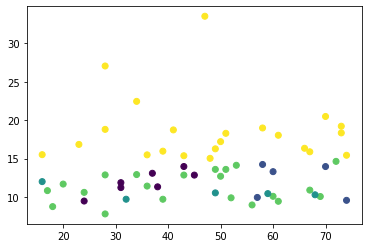

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_testset[:,0],X_testset[:,-1],c = y_testset)

In [44]:
le_Drug = preprocessing.LabelEncoder()
le_Drug.fit(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'])
y_pred = le_Drug.transform(y_pred) 

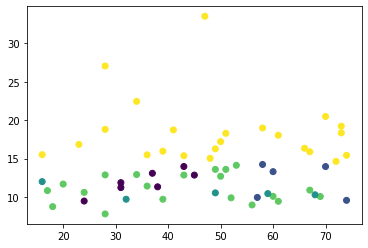

In [45]:
plt.scatter(X_testset[:,0],X_testset[:,-1],c = y_pred) #x-axis age,y-axis na_to_k

In [47]:
my_data.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY


In [46]:
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,